The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


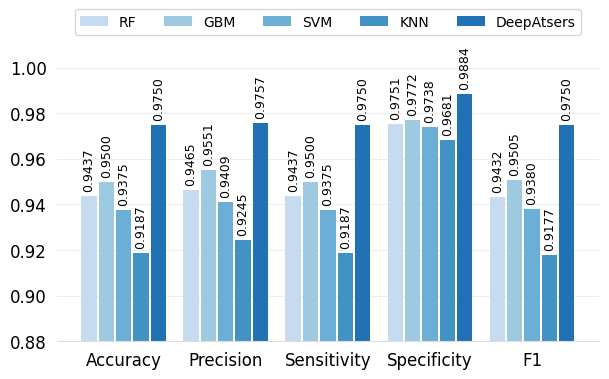

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Accuracy", "Precision", "Sensitivity", 'Specificity', 'F1')
table = {
    'RF': (0.9437, 0.9465, 0.9437, 0.9751, 0.9432),
    'GBM': (0.9500, 0.9551, 0.9500, 0.9772, 0.9505),
    'SVM': (0.9375, 0.9409, 0.9375, 0.9738, 0.9380),
    'KNN': (0.9187, 0.9245, 0.9187, 0.9681, 0.9177),
    'DeepATsers': (0.9750, 0.9757, 0.9750, 0.9884, 0.9750),
}

# Define your custom colors (using hex codes as an example)
custom_colors = ['#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5']

x = np.arange(len(species))  # the label locations
width = 0.15  # width of the bars
spacing = 0.02  # spacing between bar groups
multiplier = 0

figsize = (7, 4)
fig, ax = plt.subplots(figsize=figsize)

for i, (attribute, measurement) in enumerate(table.items()):
    offset = (width + spacing) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=custom_colors[i])

    # Add text labels on top of the bars
    for rect, label in zip(rects, measurement):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            height + 0.002,
            f'{label:.4f}',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            rotation=90
        )
    multiplier += 1

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Adjust the x-ticks and labels
ax.set_xticks(x + (width + spacing) * (len(table) - 1) / 2)
ax.set_xticklabels(species)

ax.set_ylim(0.88, 1.015)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(table))

plt.savefig('diagram/comp_model.eps', bbox_inches='tight')
plt.show()
